In [12]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [14]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
#Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
#print('Noof features:',Din)

x_train=x_train[range(Ntr),:]
y_train=y_train[range(Ntr),:]
x_test=x_test[range(Nte),:]
x_test=x_test[range(Nte),:]


Noof classes: 10
Noof training images: 50000
Noof test images: 10000


In [15]:
x_train = np.reshape(x_train,(Ntr,32,32,3))
x_test = np.reshape(x_test,(Nte,32,32,3))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
#mean_image = np.mean(x_train, axis=0)
#x_train = x_train - mean_image
#x_test = x_test - mean_image

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)


CNN

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)

model.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=45,batch_size=50,validation_data=(x_test,y_test))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

KeyboardInterrupt: 

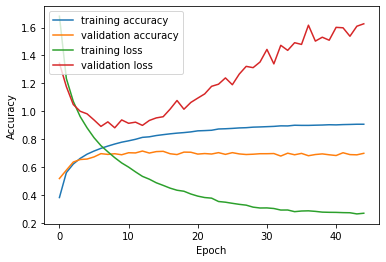

In [10]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [11]:
test_loss , test_acc=model.evaluate(x_test,y_test,verbose=2)

313/313 - 5s - loss: 1.6269 - accuracy: 0.6992
